# Kombinere tall fra to tabeller i Statistikkbanken i en figur.
## Eksempel Konsumprisindeksen: KPI og KPI-JAE 

Kombinerer data fra Statistikkbanktabellene [03013](https://www.ssb.no/statbank/table/03013) og [05327](https://www.ssb.no/statbank/table/05327)
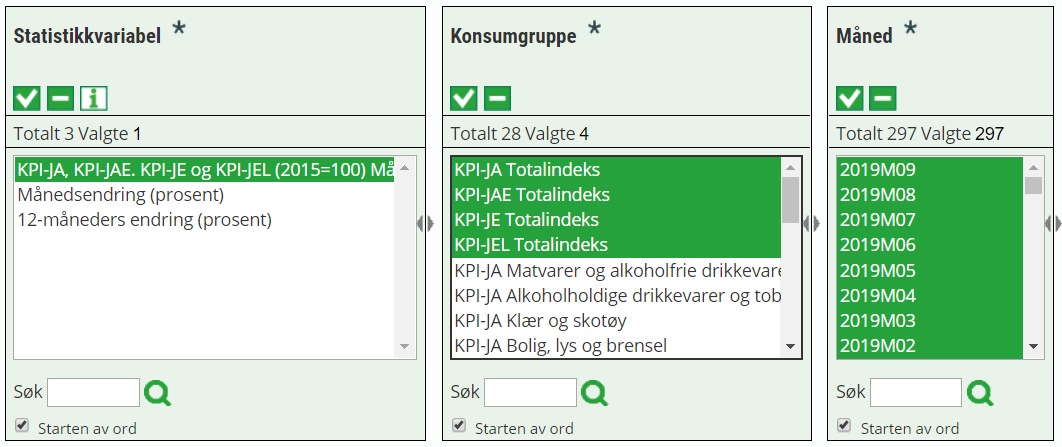

In [ ]:
#Her importerer vi ulike pakker
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import pandas as pd
from pyjstat import pyjstat  # pyjstat er for behandling av JSON-stat
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

URL til tabellenes metadata i PxWebApi, som vi skal poste spørringene mot

In [ ]:
URL1 = 'https://data.ssb.no/api/v0/no/table/05327' # KPI-jae
URL2 = 'https://data.ssb.no/api/v0/no/table/03013' # KPI total

API-spørring i JSON mot tabell 05327 - siste 5 år 

In [ ]:
sp1 = {
  "query": [
    {
      "code": "Konsumgrp",
      "selection": {
        "filter": "item",
        "values": ['JA_TOTAL', 'JAE_TOTAL', 'JE_TOTAL', 'JEL_TOTAL']
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": ["KPIJustIndMnd"]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "top",
        "values": [ "60" ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


JSON-spørring mot tabell 03013 siste 5 år

In [ ]:
sp2 = {
  "query": [
    {
      "code": "Konsumgrp",
      "selection": {
        "filter": "item",
        "values": ["TOTAL"]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": ["KpiIndMnd"]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "top",
        "values": ["60"]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


Poster spørringene sp1 og sp2 mot metadatas url'er. Resultatene lagres som res1 og res2

In [ ]:
res1 = requests.post(URL1, json=sp1)
res2 = requests.post(URL2, json=sp2)

Leser JSON-stat resultatet med biblioteket pyjstat

In [ ]:
ds1 = pyjstat.Dataset.read(res1.text)
ds2 = pyjstat.Dataset.read(res2.text)

Skriver dette til to Panda dataframes, df1 og df2.

In [ ]:
df1 = ds1.write('dataframe')
df2 = ds2.write('dataframe')

In [ ]:
df1.head(7)

In [ ]:
df1.tail() # slutten av datasettet

In [ ]:
df2.tail(15)

In [ ]:
df2.plot()  # her er det bare en serie 

In [ ]:
df1.plot() # standard plot gir alle 4 intervallene som en sammenhengende linje

### slår sammen de to "dataframene"  df1 og df2 med en enkel concat til datsettet "sammen"

In [ ]:
sammen = pd.concat([df1,df2])

Viser topp og bunn i det sammeslåtte datasettet

In [ ]:
sammen.head()

In [ ]:
sammen.tail()

### omstrukturerer (pivoterer) tabellen for å få en bedre visning

["tidy data" Hadley Wickham](https://vita.had.co.nz/papers/tidy-data.pdf)


In [ ]:
df3 = sammen.pivot(index='måned', columns='konsumgruppe', values='value')

In [ ]:
df3.head(3)

In [ ]:

df3.tail(3)

### figur med pandas innebygde plot-funksjon 

In [ ]:
df3.plot()

Plot med flere parametre

In [ ]:
df3.plot(marker="o", markersize=3, figsize=(12, 8))

Lagrer figurvisning som funksjon. Her kan du gi du kan gi høyde og bredde

In [ ]:
def visfigur(bredde=12, hoyde=6):
    fig, ax = plt.subplots(figsize=(bredde, hoyde))  
    plt.xlabel('måned') 
    plt.ylabel('index')
    ax.set_title('Figur som viser KPI total og undeliggende KPI serier')
    df3.plot(ax=ax)
    plt.show()

### Plot med ulike stiler
I Matplotlib kan du prøve ut ulike ferdige stiler. Vi kan lage vår egen etter SSBs designmal.

Prøv ut: 'Solarize_Light2',  'bmh', 'classic', 'dark_background' 'fivethirtyeight', seaborn-talk

In [ ]:
with plt.style.context('Solarize_Light2'):
    visfigur()

In [ ]:
with plt.style.context('fivethirtyeight'):
    visfigur(16, 9)